I am not an expert (not yet!) in the adtech or more specifically in the bidding. however, I have some sort of assumptions or ideas:
* for a given bidder, there should be some sort of stability,especially when it comes to the ip he/she uses (small ip descpersion)
* Also maybe a favorite device with which ( small device despersion)
* local time 
* look to the past behavior
* has the id been already flagged as bot

In [ ]:
import numpy as np
import pandas as pd

In [10]:
path = "C:\\Users\\OUMOUSS\\PycharmProjects\\Adomik\\"
bids = pd.read_csv(path+'bids.csv')

In [15]:
bids.sort_values('time', axis=0, ascending=True, inplace=True)

In [3]:
bids.shape

(7656334, 9)

In [4]:
bids.columns

Index(['bid_id', 'bidder_id', 'auction', 'merchandise', 'device', 'time',
       'country', 'ip', 'url'],
      dtype='object')

In [5]:
bids.head()

,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url
0,0,8dac2b259fd1c6d1120e519fb1ac14fbqvax8,ewmzr,jewelry,phone0,9759243157894736,us,69.166.231.58,vasstdc27m7nks3
1,1,668d393e858e8126275433046bbd35c6tywop,aeqok,furniture,phone1,9759243157894736,in,50.201.125.84,jmqlhflrzwuay9c
2,2,aa5f360084278b35d746fa6af3a7a1a5ra3xe,wa00e,home goods,phone2,9759243157894736,py,112.54.208.157,vasstdc27m7nks3
3,3,3939ac3ef7d472a59a9c5f893dd3e39fh9ofi,jefix,jewelry,phone4,9759243157894736,in,18.99.175.133,vasstdc27m7nks3
4,4,8393c48eaf4b8fa96886edc7cf27b372dsibi,jefix,jewelry,phone5,9759243157894736,in,145.138.5.37,vasstdc27m7nks3


In [15]:
# bids.describe
# bids.info()

## <span style="color:red"> Univariate analysis</span>

knowing that we have 7656334 observations, we can say that the same bidder_id comes several times in the dataset

In [120]:
len(bids['bidder_id'].unique()) # 7656334 observation

6614

same for ip addresses

In [17]:
len(bids['ip'].unique())

2303991

### country

In [123]:
def infos(col):
    print(bids[col].unique())
    print("\n#unique instances: ")
    print(len(bids[col].unique()))

In [124]:
infos('country')

['us' 'in' 'py' 'ru' 'th' 'id' 'za' 'ng' 'sd' 'au' 'hr' 'np' 'iq' 'bd' 'tr'
 'ch' 'ke' 'uk' 'fr' 'pk' 'my' 'vn' 'ro' 'gh' 'ua' 'pl' 'by' 'ar' 'zm' 'lk'
 'ph' 'br' 'es' 'mx' 'il' 'qa' 'nl' 've' 'sg' 'gt' 'ae' 'az' 'uz' 'ht' 'tz'
 'gm' 'dk' 'no' 'kw' 'mk' 'hu' 'it' 'ml' 'sv' 'bn' 'ni' 'cn' 'et' 'ge' 'mw'
 'ee' 'ye' 'kr' 'tn' 'gr' 'at' 'cm' 'ca' 'mn' 'rs' 'sz' 'pe' 'jp' 'sl' 'bh'
 'zw' 'bg' 'de' 'eu' 'cr' 'jo' 'ie' 'sa' 'eg' 'dz' 'hk' 'ec' 'si' 'lv' 'na'
 nan 'mt' 'ug' 'kg' 'se' 'bb' 'sc' 'sn' 'om' 'fi' 'cl' 'ma' 'am' 'lr' 'be'
 'bf' 'kh' 'md' 'ly' 'al' 'ba' 'bo' 'lt' 'ga' 'mr' 'jm' 'bj' 'mu' 'pa' 'cz'
 'ao' 'lu' 'me' 'af' 'kz' 'hn' 'ls' 'uy' 'lb' 'cy' 'sk' 'ir' 'la' 'dj' 'bz'
 'ci' 'is' 'mg' 'so' 'co' 'pt' 'gy' 'td' 'rw' 'pr' 'bw' 'gq' 'cv' 'mc' 'ne'
 'tg' 'bi' 'sy' 'tt' 'cd' 'sb' 'mz' 'mm' 'tj' 'tw' 'gu' 'cg' 'gl' 'nz' 'mv'
 'ps' 'tm' 'ag' 'ad' 'sr' 'ws' 'je' 'do' 'li' 'fj' 'nc' 'gi' 'cf' 'mo' 'dm'
 'bt' 're' 'fo' 'mp' 'bm' 'gn' 'tl' 'pg' 'pf' 'vc' 'zz' 'bs' 'aw' 'gb' 'vi'
 'mh' 'tc' 'a

In [102]:
country_count = bids['country'].value_counts()

In [105]:
print("top 10: ")
print(country_count[:10])
print("\nlowest 10: ")
print(country_count[-10:])

top 10: 
in    1788731
ng     586586
id     453611
tr     319574
us     318103
za     297942
ke     287962
th     238172
my     216799
vn     190342
Name: country, dtype: int64

lowest 10: 
gb    7
zz    7
gn    5
vc    4
an    2
gp    2
gi    2
er    2
tc    1
mh    1
Name: country, dtype: int64


### device

In [126]:
infos('device')

['phone0' 'phone1' 'phone2' ..., 'phone7496' 'phone7497' 'phone7498']

#unique instances: 
7351


In [106]:
device_count = bids['device'].value_counts()

### merchandise

In [108]:
infos('merchandise')

['jewelry' 'furniture' 'home goods' 'mobile' 'sporting goods'
 'office equipment' 'computers' 'books and music' 'clothing' 'auto parts']

#unique_devices: 
10


In [97]:
merchandise_count = bids['merchandise'].value_counts()

C:\Users\OUMOUSS\Anaconda3\lib\site-packages\seaborn\categorical.py:1424: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


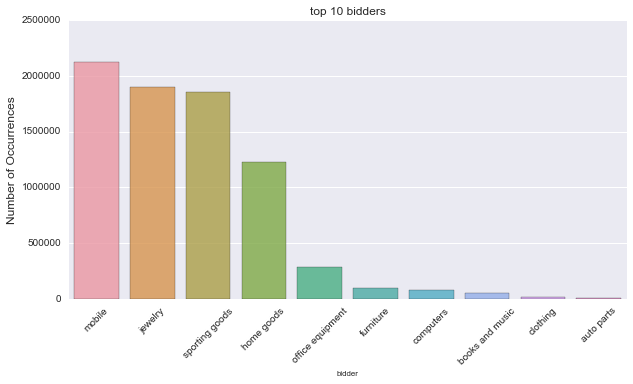

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(10,5))
sns.barplot(merchandise_count.index, merchandise_count.values, alpha=0.8)
plt.title('top 10 bidders')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('bidder', fontsize=8)
plt.xticks(rotation=45)
plt.show()

### Time 

In [130]:
bids.time.describe()

count    7.656334e+06
mean     9.697978e+15
std      5.250518e+13
min      9.631917e+15
25%      9.641139e+15
50%      9.700654e+15
75%      9.761744e+15
max      9.772885e+15
Name: time, dtype: float64

In [147]:
t_min,t_max = bids.time.min(), bids.time.max()
t_min,t_max

(9631916842105263, 9772885210526315)

In [48]:
grouping_time.columns

Index(['bidder_id_', 'time_min', 'time_max'], dtype='object')

In [47]:
# grouping_time.columns = grouping_time.columns.droplevel(0)
grouping_time = bids.groupby('bidder_id').agg({
        'time':['min', 'max']
    }).reset_index()
grouping_time.columns = ["_".join(x) for x in grouping_time.columns.ravel()]
grouping_time.rename(columns={'bidder_id_': 'bidder_id'})

,bidder_id,time_min,time_max
0,001068c415025a009fee375a12cff4fcnht8y,9706345052631578,9706345052631578
1,002d229ffb247009810828f648afc2ef593rb,9766744105263157,9766744210526315
2,0030a2dd87ad2733e0873062e4f83954mkj86,9704553947368421,9704553947368421
3,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,9640018631578947,9705974315789473
4,00486a11dff552c4bd7696265724ff81yeo9v,9632636526315789,9708986368421052
5,0051aef3fdeacdadba664b9b3b07e04e4coc6,9759271368421052,9770226578947368
6,0053b78cde37c4384a20d2da9aa4272aym4pb,9631938631578947,9709219052631578
7,0061edfc5b07ff3d70d693883a38d370oy4fs,9759268736842105,9772865684210526
8,00862324eb508ca5202b6d4e5f1a80fc3t3lp,9636539210526315,9636542263157894
9,009479273c288b1dd096dc3087653499lrx3c,9634283368421052,9634283368421052


In [49]:
grouping_time['time_diff'] = grouping_time['time_max']-grouping_time['time_min']
grouping_time.isnull().sum()

## <span style="color:red"> bivariate analysis</span>

** from how many countries a bidder (bidder_id) has made a bid ?**

we can see that some bidder are making bids from different countries


In [111]:
bid_country_count = bids.groupby("bidder_id").agg({"country": np.count_nonzero, "country": pd.Series.nunique})

In [117]:
bid_country_count.head(10)

,country
bidder_id,
001068c415025a009fee375a12cff4fcnht8y,1
002d229ffb247009810828f648afc2ef593rb,1
0030a2dd87ad2733e0873062e4f83954mkj86,1
003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,1
00486a11dff552c4bd7696265724ff81yeo9v,1
0051aef3fdeacdadba664b9b3b07e04e4coc6,4
0053b78cde37c4384a20d2da9aa4272aym4pb,73
0061edfc5b07ff3d70d693883a38d370oy4fs,4
00862324eb508ca5202b6d4e5f1a80fc3t3lp,1


In [118]:
""" for more details """
bidder_country_grouping = bids.groupby(['bidder_id', 'country'])

In [119]:
bidder_country_grouping.size()

bidder_id                              country
001068c415025a009fee375a12cff4fcnht8y  bn           1
002d229ffb247009810828f648afc2ef593rb  sg           2
0030a2dd87ad2733e0873062e4f83954mkj86  ir           1
003180b29c6a5f8f1d84a6b7b6f7be57tjj1o  id           3
00486a11dff552c4bd7696265724ff81yeo9v  ng          20
0051aef3fdeacdadba664b9b3b07e04e4coc6  bg          18
                                       id           2
                                       se           4
                                       us          44
0053b78cde37c4384a20d2da9aa4272aym4pb  ae          11
                                       au           4
                                       bd          31
                                       be           5
                                       bf           4
                                       bj           7
                                       bn           4
                                       bo           1
                                   

**total_bid : how many times the bidder (bidder_id) shows up in our dataset?**

In [114]:
total_bid = bids['bidder_id'].value_counts()

In [116]:
total_bid.describe()

count      6614.000000
mean       1157.595101
std        9593.019312
min           1.000000
25%           3.000000
50%          18.000000
75%         187.000000
max      515033.000000
Name: bidder_id, dtype: float64

except one case, all our bidders, bid on one merchandise only

In [72]:
grouped = bids.groupby('bidder_id').merchandise.nunique()

In [121]:
grouped.nlargest(10)

bidder_id
e90e4701234b13b7a233a86967436806wqqw4    2
001068c415025a009fee375a12cff4fcnht8y    1
002d229ffb247009810828f648afc2ef593rb    1
0030a2dd87ad2733e0873062e4f83954mkj86    1
003180b29c6a5f8f1d84a6b7b6f7be57tjj1o    1
00486a11dff552c4bd7696265724ff81yeo9v    1
0051aef3fdeacdadba664b9b3b07e04e4coc6    1
0053b78cde37c4384a20d2da9aa4272aym4pb    1
0061edfc5b07ff3d70d693883a38d370oy4fs    1
00862324eb508ca5202b6d4e5f1a80fc3t3lp    1
Name: merchandise, dtype: int64

Very interesting! a bidder_id with so much ip addresses.

In [128]:
bid_ip_grouped = bids.groupby('bidder_id').ip.nunique()

In [129]:
bid_ip_grouped.nlargest(10)

bidder_id
9655ccc7c0c193f1549475f02c54dce45kjw7    111918
197e90906939267ace2422e78e8e83889znqp    109159
f5b2bbad20d1d7ded3ed960393bec0f40u6hn    101275
29c103503e1d6ace5626fb07a5ab0dafrtjvs     58150
a58ace8b671a7531c88814bc86b2a34cf0crb     53405
0ea62aaa9c3ffcc6db584cb69c1f6c4bcripp     52257
aa5f360084278b35d746fa6af3a7a1a5ra3xe     51891
13b022681839a351f07d017c0edd9ed6ao2w5     45984
2240c4ebe5702228bbd2bb3b988de7086zge8     44619
092ceb77862ed0c120af013fe90093e64qknp     34395
Name: ip, dtype: int64

In [ ]:
train = pd.read_csv(path+'train.csv')
test = pd.read_csv(path+'train.csv')

In [ ]:
training = pd.read_csv(path_to_data + 'training_set.csv', sep=',', header=0)
training_info = pd.read_csv(path_to_data + 'training_info.csv', sep=',', header=0)

In [ ]:
def email_sender_df(training):
    email_sender = {}
    for index, series in training.iterrows():
        row = series.tolist()
        sender = row[0]
        ids = row[1:][0].split(' ')
        for id in ids:
            email_sender[int(id)] = sender
    es_df = pd.DataFrame.from_dict(email_sender, orient='index').reset_index()
    es_df.rename(columns={'index': 'mid', 0: 'sender'}, inplace=True)
    print('df shape',es_df.shape)
    return es_df

In [ ]:
es_df = email_sender_df(training)
train_df = pd.merge(training_info,es_df,on='mid',how='inner')